#EDA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shape: (48039, 29)

Columns: ['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State', 'State ANSI', 'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed', 'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value', 'CV (%)', 'yield_kg_per_acre', 'price_usd_per_kg', 'Land_Value', 'Soil_Texture', 'Soil_pH', 'Organic_Matter(%)', 'Soil_Depth(cm)', 'Drainage_Class']

Missing Values:
 Program                  0
Year                     0
Period                   0
Week Ending          48039
Geo Level                0
State                    0
State ANSI               0
Ag District            365
Ag District Code         0
County                   0
County ANSI           4913
Zip Code             48039
Region               48039
watershed_code           0
Watershed            48039
Commodity                0
Data Item                0
Domain                   0
Domain Category          0
Value                    0
CV (%)

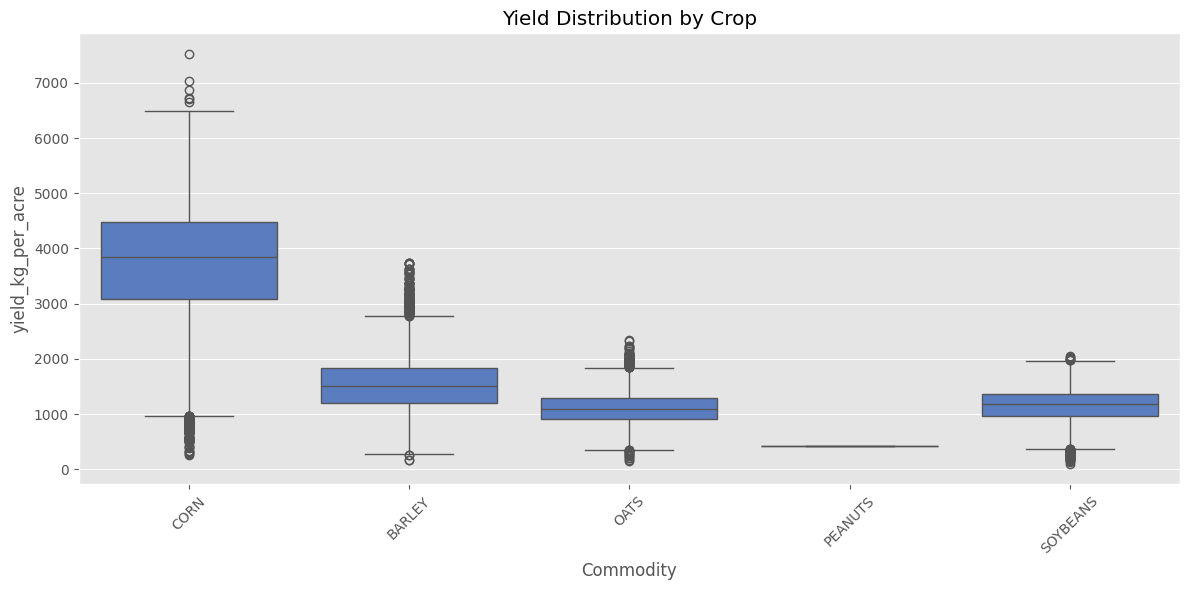

<ipython-input-6-4621f341976d>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='yield_kg_per_acre', hue='Commodity', estimator='mean', ci=None)


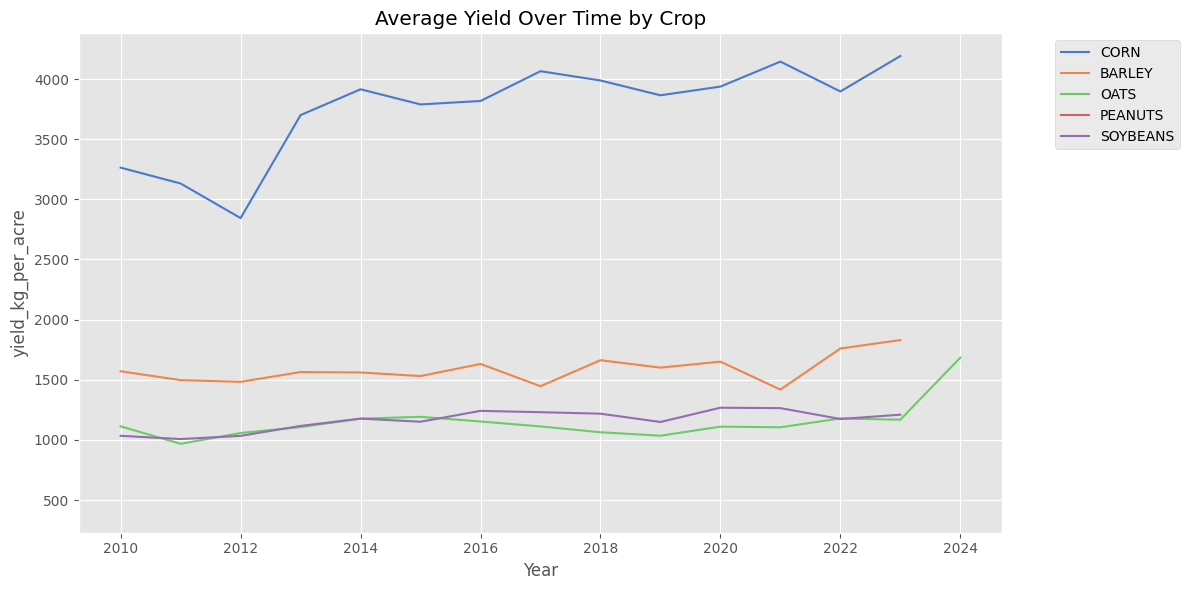

<ipython-input-6-4621f341976d>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_top_states, x='Year', y='Land_Value', hue='State', estimator='mean', ci=None)


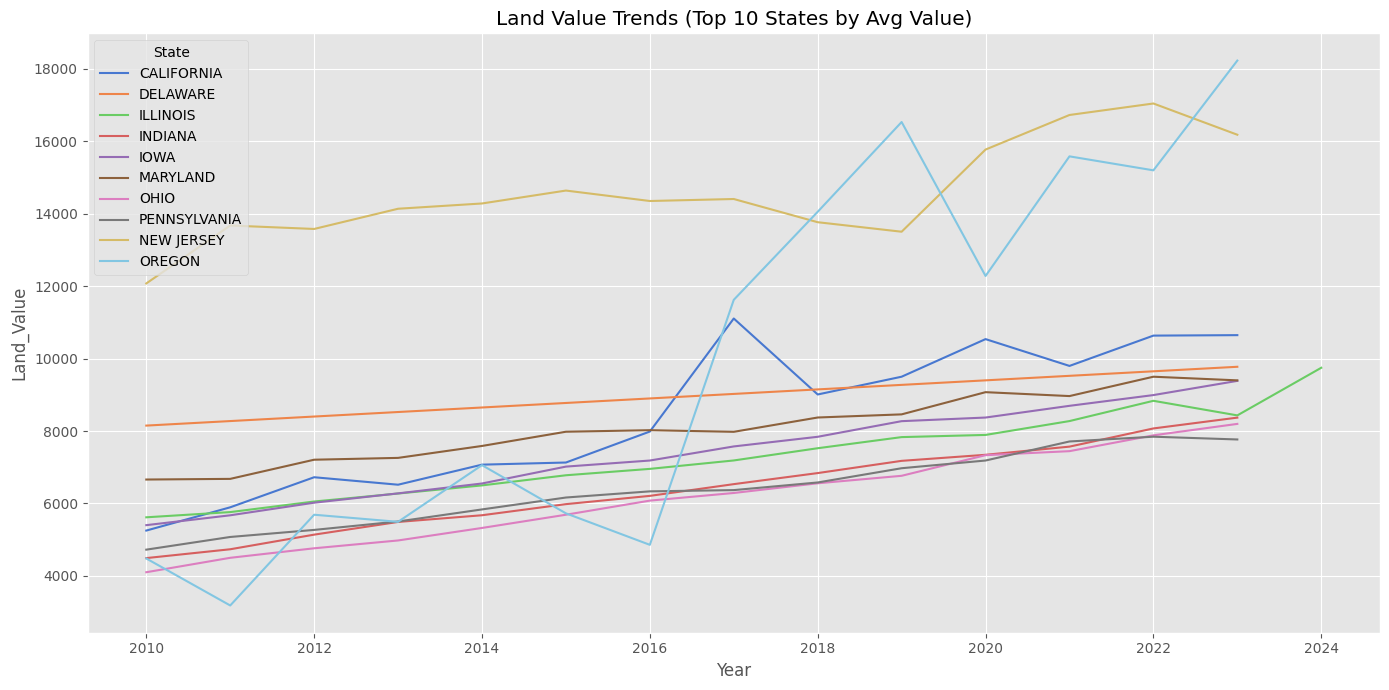

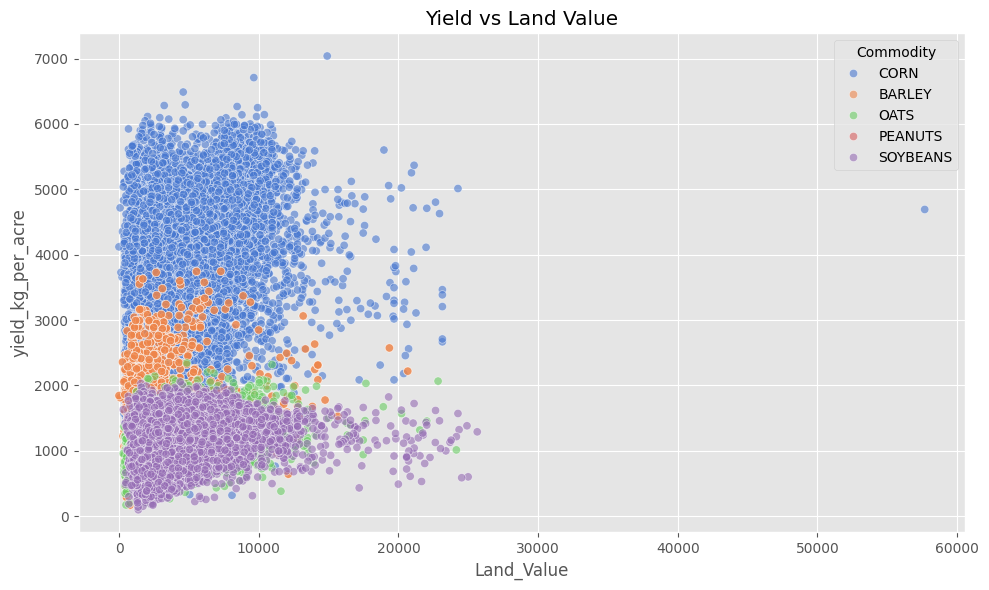


Summary statistics saved as 'dataset_summary_stats.csv'


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('ggplot')  # Optional: 'ggplot', 'bmh', or simply remove this
sns.set_palette('muted')
%matplotlib inline

# Step 2: Load your final dataset
df = pd.read_csv('/dataset_capstone.csv')

# Step 3: Overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Distribution of Yield by Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Commodity', y='yield_kg_per_acre')
plt.title('Yield Distribution by Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('yield_distribution_by_crop.png')
plt.show()

# Step 5: Yield Trend Over Time (All Crops)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='yield_kg_per_acre', hue='Commodity', estimator='mean', ci=None)
plt.title('Average Yield Over Time by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('avg_yield_over_time.png')
plt.show()

# Step 6: Land Value Trend by State (Top 10)
top_states = df.groupby('State')['Land_Value'].mean().sort_values(ascending=False).head(10).index
df_top_states = df[df['State'].isin(top_states)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_states, x='Year', y='Land_Value', hue='State', estimator='mean', ci=None)
plt.title('Land Value Trends (Top 10 States by Avg Value)')
plt.tight_layout()
plt.savefig('land_value_trends_top_states.png')
plt.show()

# Step 7: Yield vs. Land Value Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Land_Value', y='yield_kg_per_acre', hue='Commodity', alpha=0.6)
plt.title('Yield vs Land Value')
plt.tight_layout()
plt.savefig('yield_vs_land_value.png')
plt.show()


# Step 9: Save Summary Stats
summary = df.describe()
summary.to_csv('/content/dataset_summary_stats.csv')
print("\nSummary statistics saved as 'dataset_summary_stats.csv'")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

⚠️ Skipping non-numeric soil column: Soil_Texture → contains values like ['Silt' 'Sandy Loam' 'Loam' 'Clay']


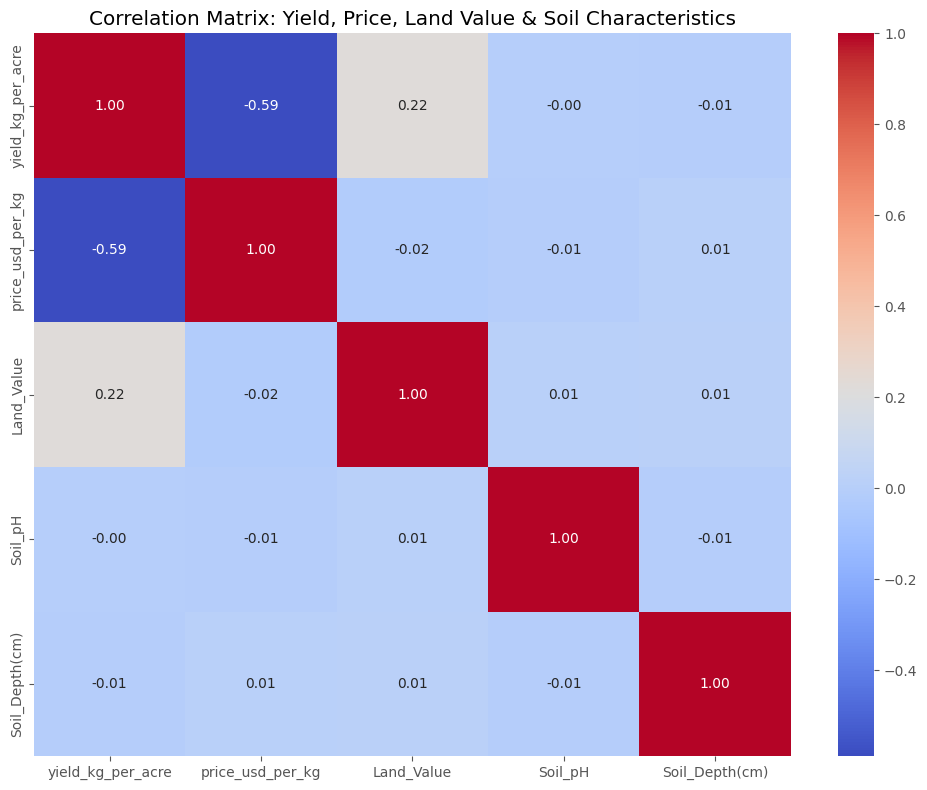

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (if not already loaded)
df = pd.read_csv('/dataset_capstone.csv')

# Identify soil-related columns
soil_cols = [col for col in df.columns if 'soil_' in col.lower()]

# Initialize list of numeric soil columns
numeric_soil_cols = []

# Check and collect only numeric soil columns
for col in soil_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
        numeric_soil_cols.append(col)
    except:
        print(f"⚠️ Skipping non-numeric soil column: {col} → contains values like {df[col].dropna().unique()[:5]}")

# Prepare final list of columns for correlation
correlation_columns = ['yield_kg_per_acre', 'price_usd_per_kg', 'Land_Value'] + numeric_soil_cols

# Drop rows with missing values in those columns
numeric_df = df[correlation_columns].dropna()

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Yield, Price, Land Value & Soil Characteristics")
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download('/content/dataset_summary_stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Machine Learning Models

🔍 Linear Regression Evaluation:
R² Score: 0.4412296980566158
MAE: 872.5173117046317
RMSE: 1090.390903274324
------------------------------
🔍 Random Forest Evaluation:
R² Score: 0.9111330710310207
MAE: 290.9306384601648
RMSE: 434.84616863523513
------------------------------
🔍 XGBoost Evaluation:
R² Score: 0.9163247523201604
MAE: 292.52058271427705
RMSE: 421.9529864974168
------------------------------


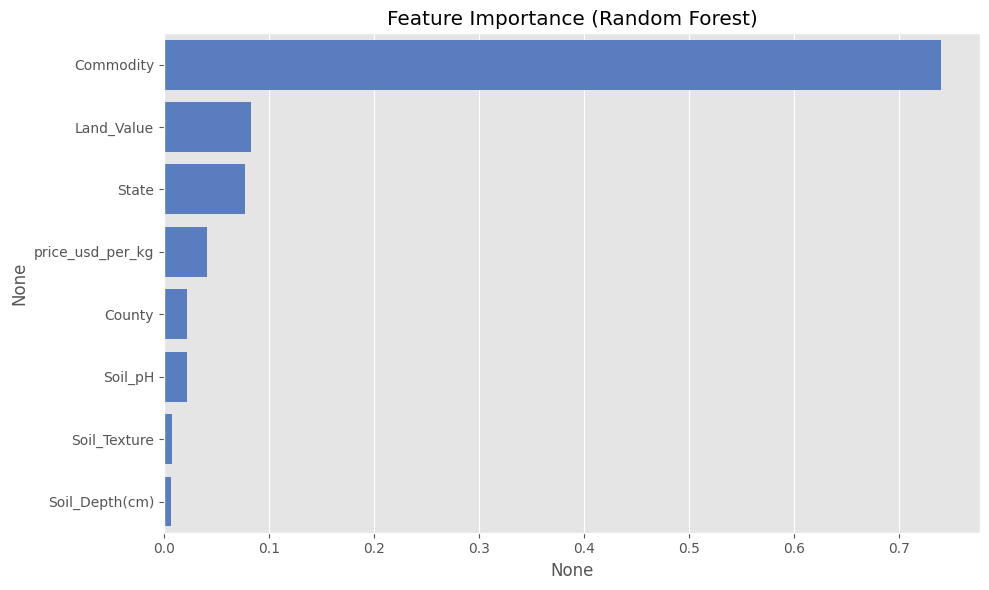

In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Step 2: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/capstone_dataset/dataset_capstone.csv')  # Update path if needed

# Step 3: Drop rows with missing target (yield)
df = df.dropna(subset=['yield_kg_per_acre'])

# Step 4: Feature Selection
features = ['price_usd_per_kg', 'Land_Value', 'State', 'County', 'Commodity'] + [col for col in df.columns if 'soil_' in col.lower()]
target = 'yield_kg_per_acre'

# Step 5: Encode categorical features (including string-based soil columns)
df_encoded = df[features + [target]].copy()

# Identify all non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to all categorical columns
for col in non_numeric_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Step 6: Fill missing numeric values with column mean
df_encoded = df_encoded.fillna(df_encoded.mean(numeric_only=True))

# Step 7: Train-test split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Modeling - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Step 9: Modeling - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Step 10: Modeling - XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Step 11: Evaluation
def print_metrics(name, y_true, y_pred):
    print(f"🔍 {name} Evaluation:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 30)

print_metrics("Linear Regression", y_test, lr_preds)
print_metrics("Random Forest", y_test, rf_preds)
print_metrics("XGBoost", y_test, xgb_preds)

# Step 12: Feature Importance (Random Forest)
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

<ipython-input-13-fb4bb28ec1ca>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_corn, x='yield_kg_per_acre', y='State', palette='Blues_d')


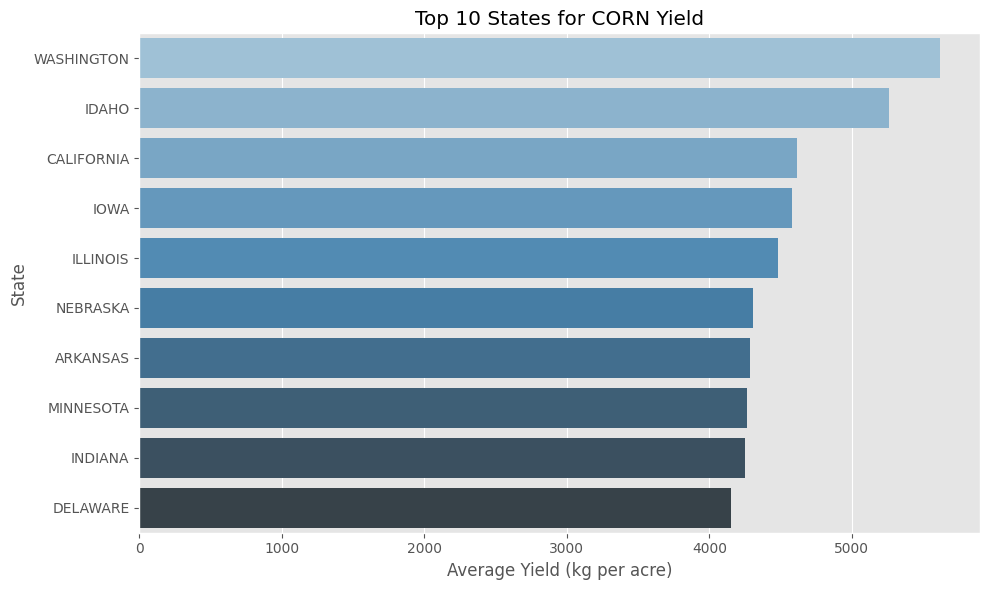

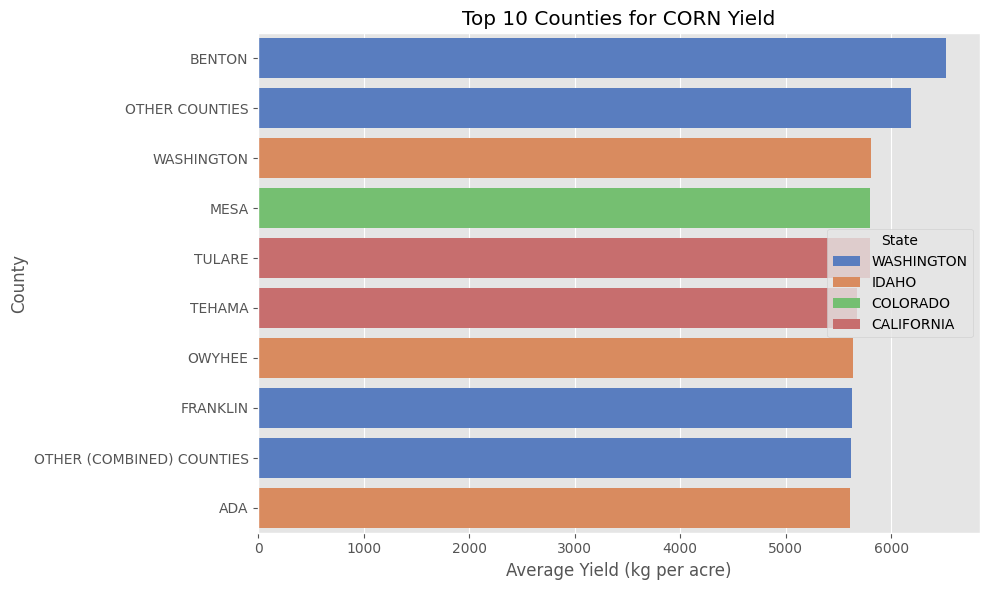

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/capstone_dataset/dataset_capstone.csv')

# Focus on relevant columns
df = df[['Year', 'State', 'County', 'Commodity', 'yield_kg_per_acre']]

# Drop rows with missing yield or commodity info
df = df.dropna(subset=['yield_kg_per_acre', 'Commodity'])

# Get average yield per state per crop
state_crop_yield = df.groupby(['State', 'Commodity'])['yield_kg_per_acre'].mean().reset_index()
state_crop_yield = state_crop_yield.sort_values(['Commodity', 'yield_kg_per_acre'], ascending=[True, False])

# Get average yield per county per crop
county_crop_yield = df.groupby(['State', 'County', 'Commodity'])['yield_kg_per_acre'].mean().reset_index()
county_crop_yield = county_crop_yield.sort_values(['Commodity', 'yield_kg_per_acre'], ascending=[True, False])

# Save to CSV (optional)
# Save to Drive inside the correct capstone_dataset folder
state_crop_yield.to_csv('/content/drive/MyDrive/capstone_dataset/top_states_yield.csv', index=False)
county_crop_yield.to_csv('/content/drive/MyDrive/capstone_dataset/top_counties_yield.csv', index=False)

# 🔍 Plot: Top 10 states by average yield for CORN
top_states_corn = state_crop_yield[state_crop_yield['Commodity'] == 'CORN'].head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_states_corn, x='yield_kg_per_acre', y='State', palette='Blues_d')
plt.title('Top 10 States for CORN Yield')
plt.xlabel('Average Yield (kg per acre)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 🔍 Plot: Top 10 counties for CORN
top_counties_corn = county_crop_yield[county_crop_yield['Commodity'] == 'CORN'].head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_counties_corn, x='yield_kg_per_acre', y='County', hue='State', dodge=False)
plt.title('Top 10 Counties for CORN Yield')
plt.xlabel('Average Yield (kg per acre)')
plt.ylabel('County')
plt.tight_layout()
plt.show()

<ipython-input-34-6d6b8d2c7ab3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, ax=axes[i], palette="Blues_d")
<ipython-input-34-6d6b8d2c7ab3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, ax=axes[i], palette="Blues_d")
<ipython-input-34-6d6b8d2c7ab3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, ax=axes[i], palette="Blues_d")
<ipython-input-34-6d6b8d2c7ab3>:27: FutureWarning: 

Passing `palette` without assign

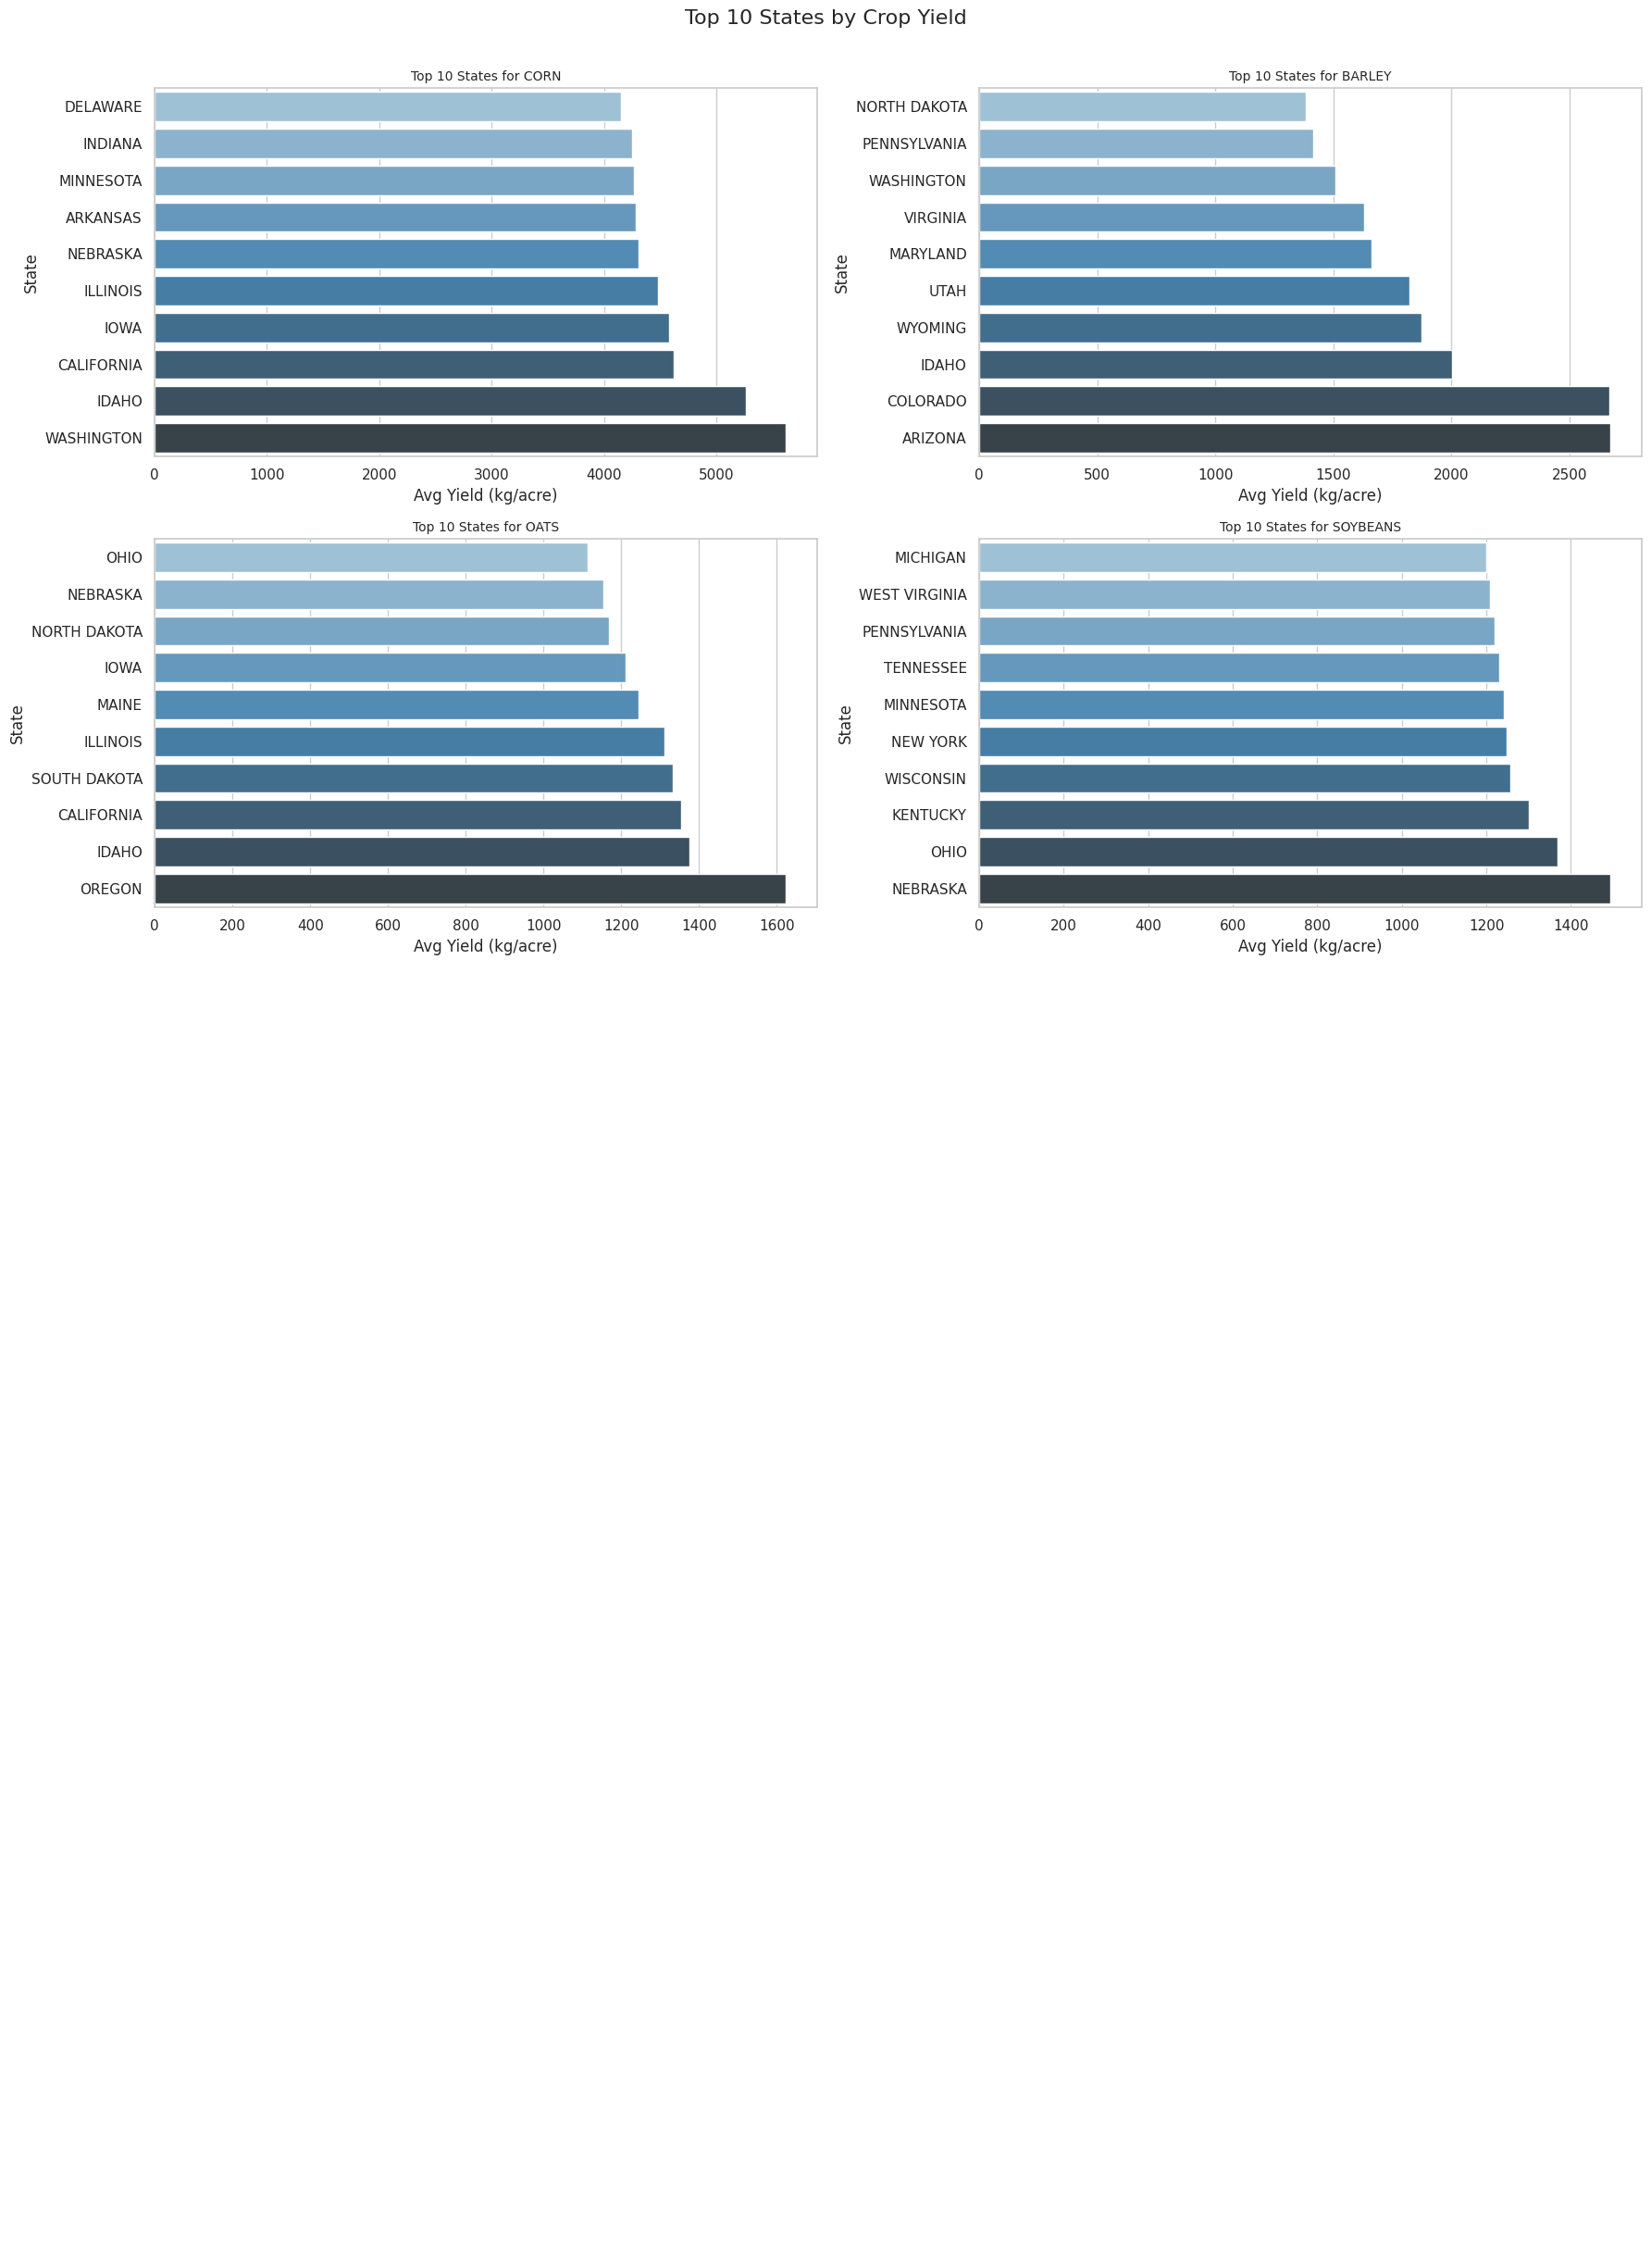

<ipython-input-34-6d6b8d2c7ab3>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, ax=axes[i], palette="YlOrBr")
<ipython-input-34-6d6b8d2c7ab3>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, ax=axes[i], palette="YlOrBr")
<ipython-input-34-6d6b8d2c7ab3>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, ax=axes[i], palette="YlOrBr")
<ipython-input-34-6d6b8d2c7ab3>:49: FutureWarning: 

Passing `palette` witho

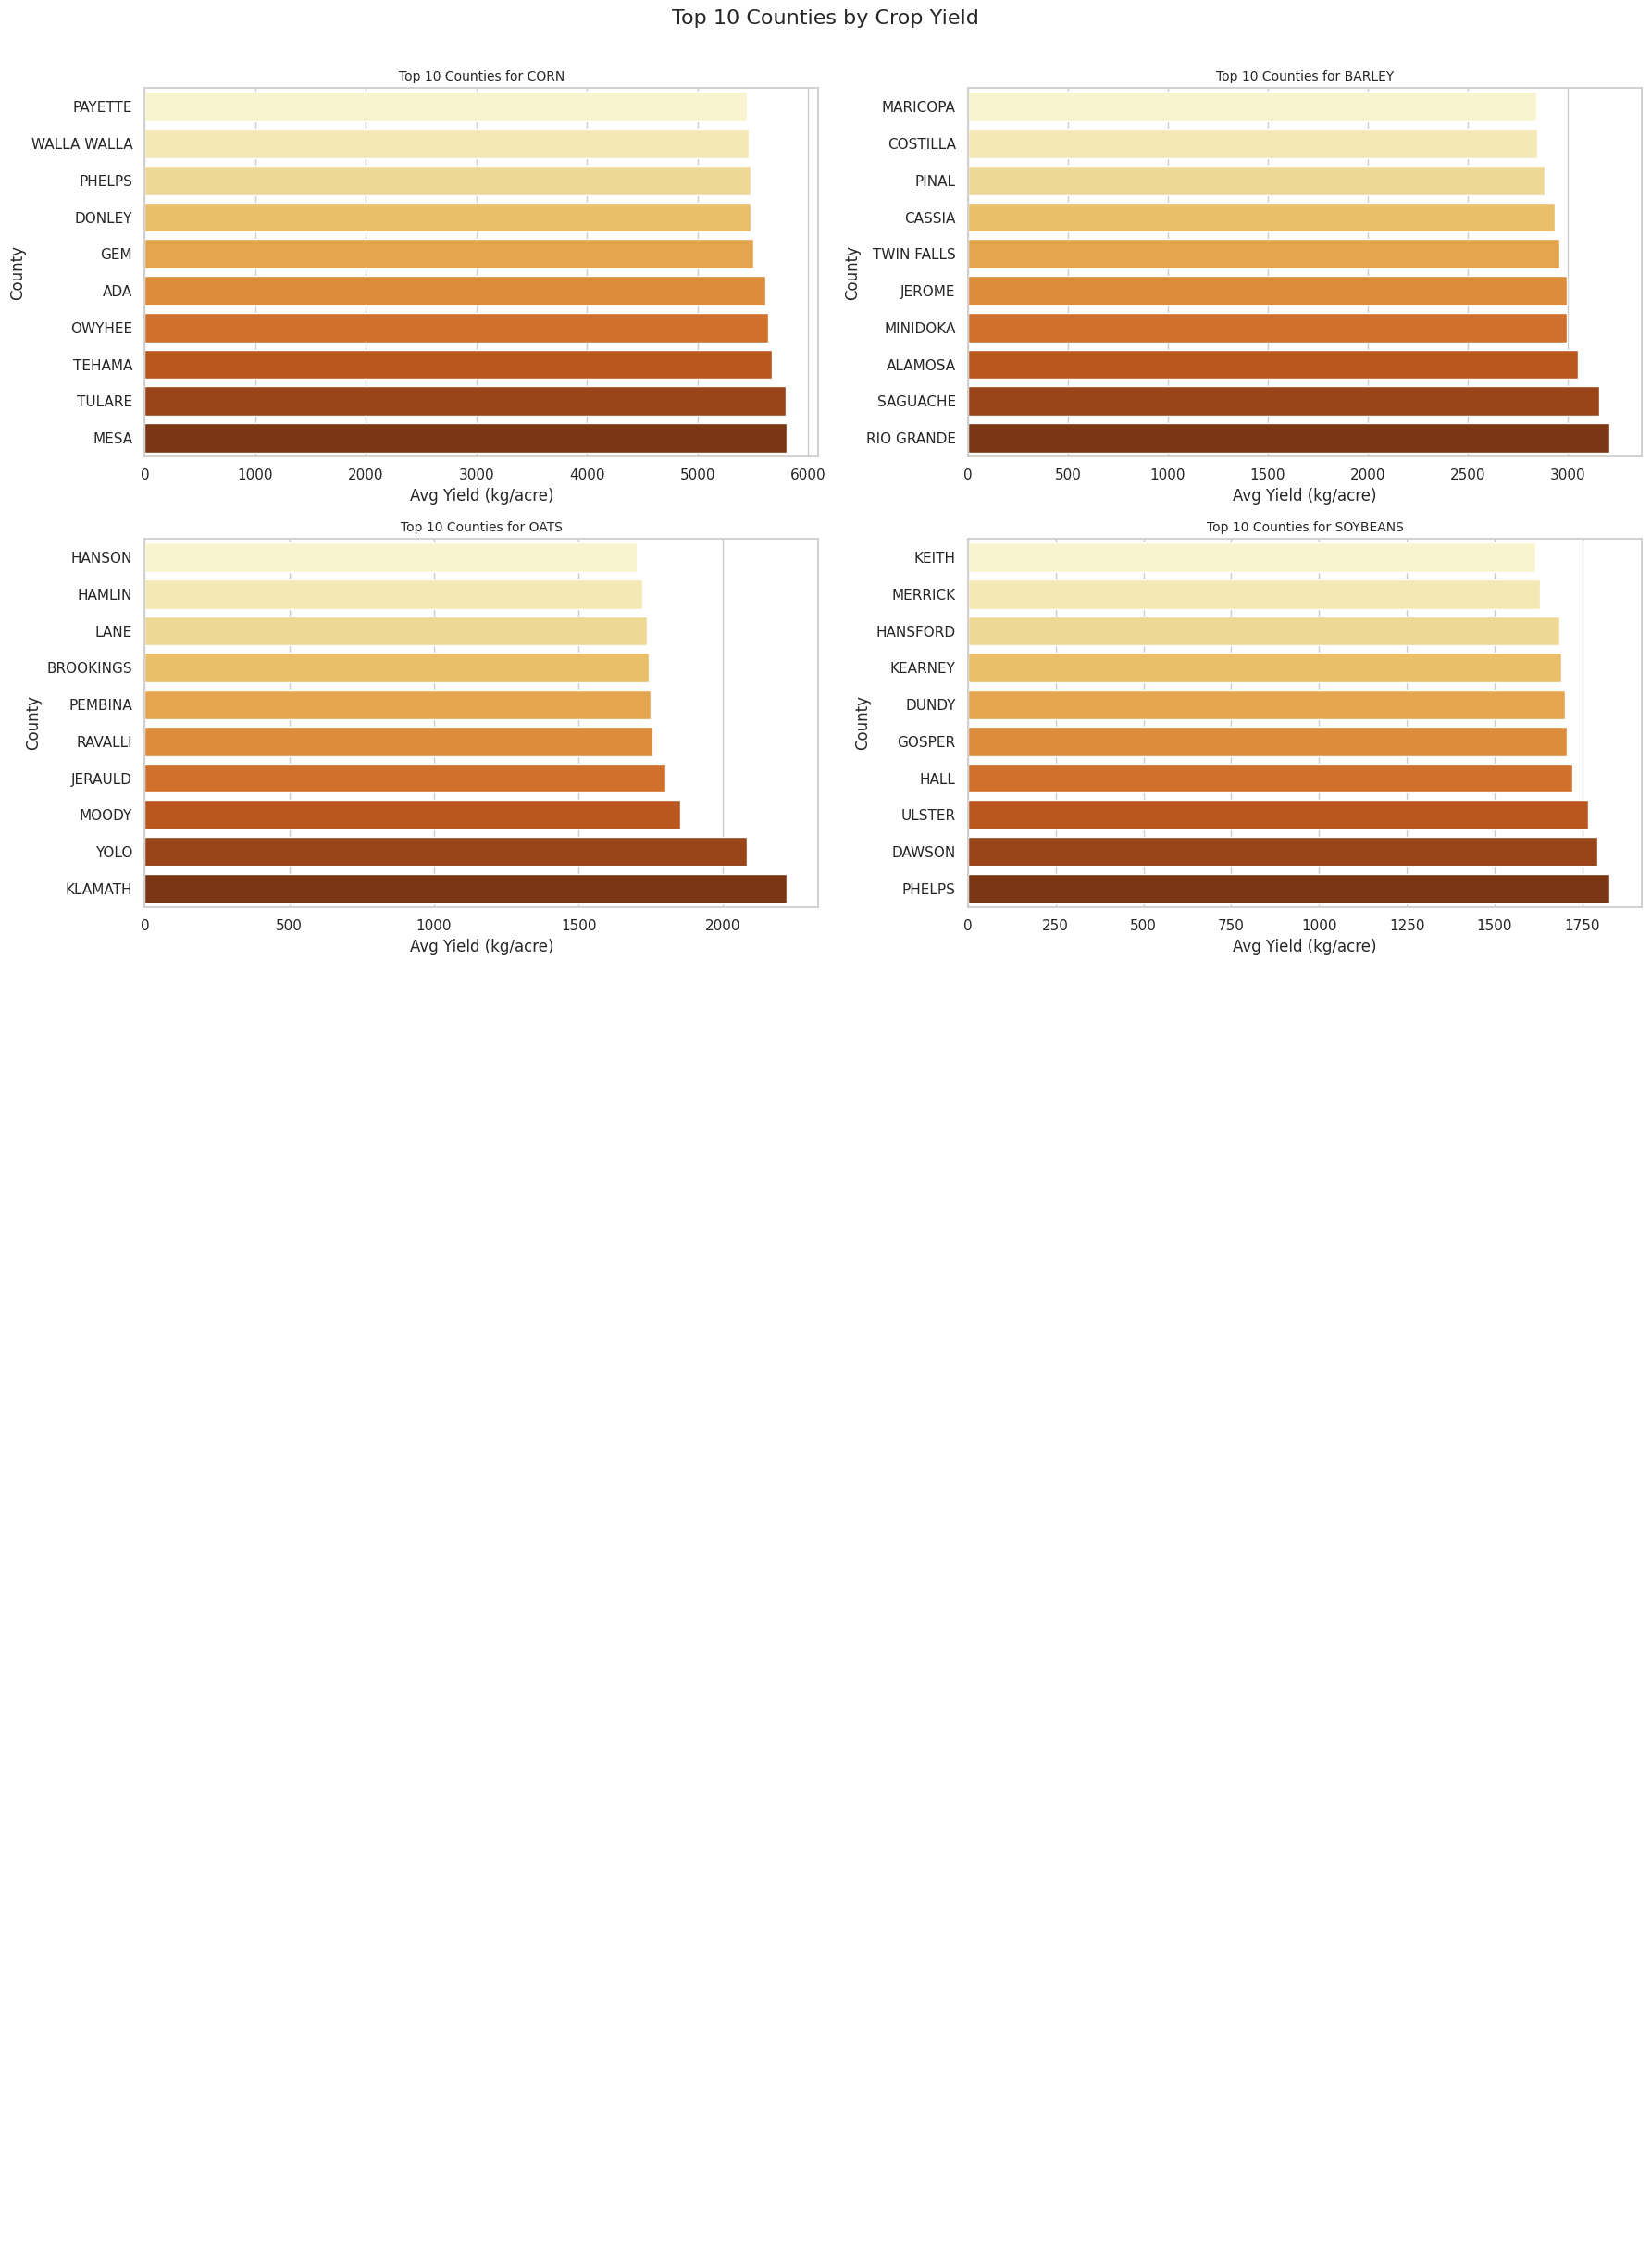

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/dataset_capstone.csv')  # Update if needed

# Clean column names
df.columns = df.columns.str.strip()

# Drop missing yield values
df = df.dropna(subset=['yield_kg_per_acre'])

# Get commodities with at least 10 entries
valid_commodities = df.groupby('Commodity').filter(lambda x: x['yield_kg_per_acre'].notna().sum() >= 10)['Commodity'].unique()

# Set seaborn style
sns.set(style='whitegrid')

# ---------- 🔷 Plot: Top 10 STATES by Crop ----------
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 24))
axes = axes.flatten()

for i, crop in enumerate(valid_commodities):
    crop_df = df[df['Commodity'] == crop]
    top_states = crop_df.groupby('State')['yield_kg_per_acre'].mean().nlargest(10).sort_values()
    sns.barplot(x=top_states.values, y=top_states.index, ax=axes[i], palette="Blues_d")
    axes[i].set_title(f"Top 10 States for {crop}", fontsize=10)
    axes[i].set_xlabel('Avg Yield (kg/acre)')
    axes[i].set_ylabel('State')

# Hide unused plots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Top 10 States by Crop Yield", fontsize=16, y=1.02)
plt.savefig("top_states_by_crop_yield_filtered.png")
plt.show()


# ---------- 🔷 Plot: Top 10 COUNTIES by Crop ----------
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 24))
axes = axes.flatten()

for i, crop in enumerate(valid_commodities):
    crop_df = df[df['Commodity'] == crop]
    top_counties = crop_df.groupby('County')['yield_kg_per_acre'].mean().nlargest(10).sort_values()
    sns.barplot(x=top_counties.values, y=top_counties.index, ax=axes[i], palette="YlOrBr")
    axes[i].set_title(f"Top 10 Counties for {crop}", fontsize=10)
    axes[i].set_xlabel('Avg Yield (kg/acre)')
    axes[i].set_ylabel('County')

# Hide unused plots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Top 10 Counties by Crop Yield", fontsize=16, y=1.02)
plt.savefig("top_counties_by_crop_yield_filtered.png")
plt.show()

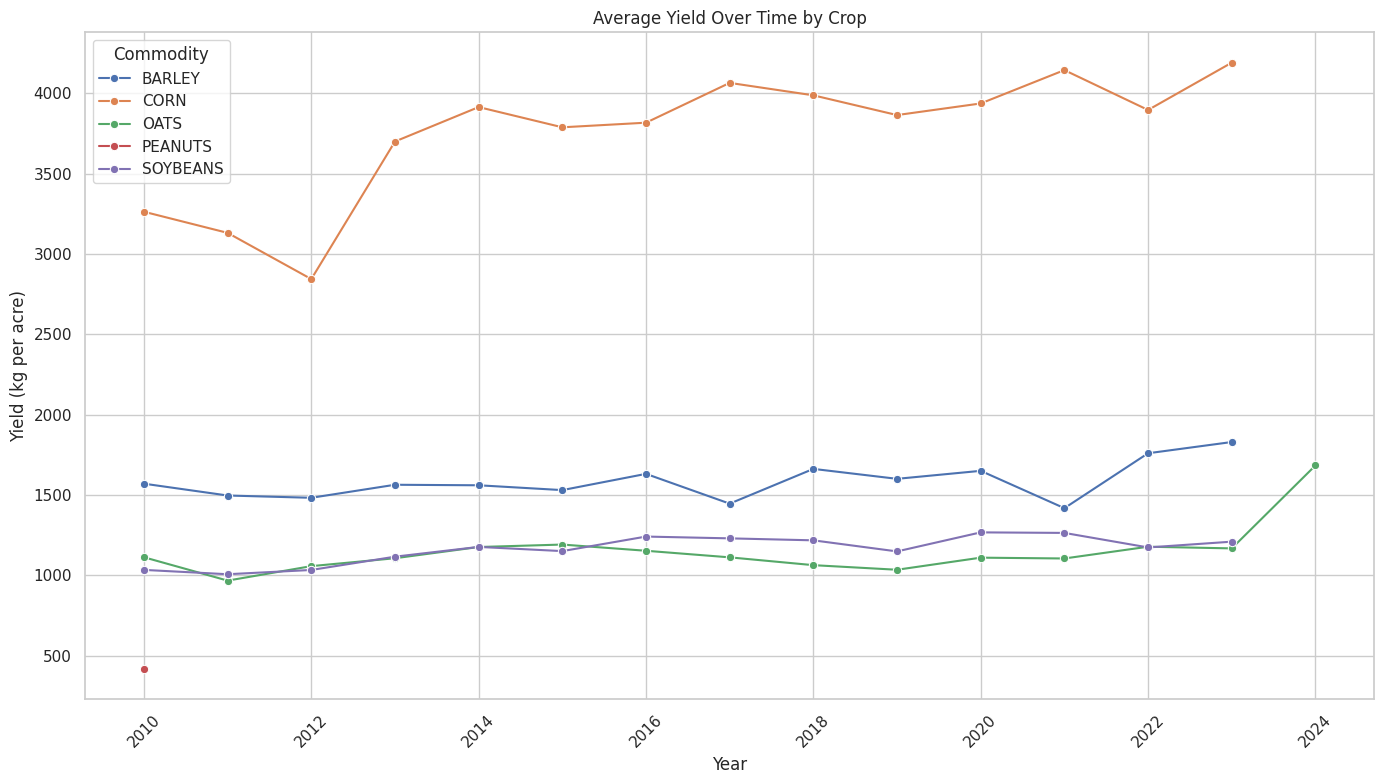

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/dataset_capstone.csv')

# Filter needed columns
df = df[['Year', 'Commodity', 'yield_kg_per_acre', 'Soil_pH', 'Organic_Matter(%)', 'Land_Value', 'price_usd_per_kg']]
df = df.dropna(subset=['yield_kg_per_acre'])

# Group by Year and Commodity
avg_trends = df.groupby(['Year', 'Commodity']).agg({
    'yield_kg_per_acre': 'mean',
    'Soil_pH': 'mean',
    'Organic_Matter(%)': 'mean',
    'Land_Value': 'mean',
    'price_usd_per_kg': 'mean'
}).reset_index()

# Plotting yield trend by crop
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_trends, x='Year', y='yield_kg_per_acre', hue='Commodity', marker="o")
plt.title('Average Yield Over Time by Crop')
plt.ylabel('Yield (kg per acre)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Save the plot
# plt.savefig('yield_trend_by_crop.png')

🔍 Random Forest Performance:
R²: 0.922
MAE: 279.12
RMSE: 415.54


<ipython-input-36-5c38309d080c>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette='viridis')
<ipython-input-36-5c38309d080c>:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


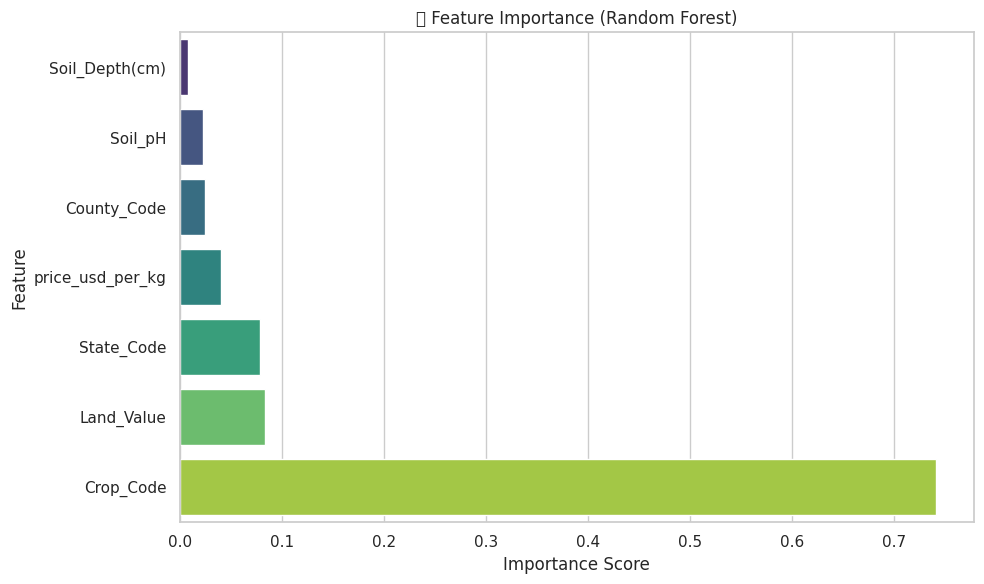

In [ ]:
# 📌 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 📌 Step 2: Load your dataset
df = pd.read_csv('/dataset_capstone.csv')

# 📌 Step 3: Filter to only top 5 crops (to reduce complexity)
top_crops = ['CORN', 'BARLEY', 'OATS', 'PEANUTS', 'SOYBEANS']
df = df[df['Commodity'].isin(top_crops)]

# 📌 Step 4: Drop rows with missing target or essential features
df = df.dropna(subset=['yield_kg_per_acre', 'Land_Value', 'price_usd_per_kg', 'Soil_pH', 'Soil_Depth(cm)'])

# 📌 Step 5: Encode categorical columns using LabelEncoder (memory-efficient)
le_state = LabelEncoder()
le_county = LabelEncoder()
le_crop = LabelEncoder()

df['State_Code'] = le_state.fit_transform(df['State'].astype(str))
df['County_Code'] = le_county.fit_transform(df['County'].astype(str))
df['Crop_Code'] = le_crop.fit_transform(df['Commodity'].astype(str))

# 📌 Step 6: Select features and target
features = ['State_Code', 'County_Code', 'Crop_Code', 'price_usd_per_kg',
            'Land_Value', 'Soil_pH', 'Soil_Depth(cm)']
target = 'yield_kg_per_acre'

X = df[features]
y = df[target]

# 📌 Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 8: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 📌 Step 9: Predict and Evaluate
# 📌 Step 9: Predict and Evaluate
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # √MSE manually

print(f"🔍 Random Forest Performance:\nR²: {r2:.3f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


# 📌 Step 10: Plot Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette='viridis')
plt.title("📊 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

🔍 Random Forest Performance (No Crop, Price, Land Value):
R²: 0.239
MAE: 1086.65
RMSE: 1272.90


<ipython-input-39-3fd7c04e6a36>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
<ipython-input-39-3fd7c04e6a36>:54: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


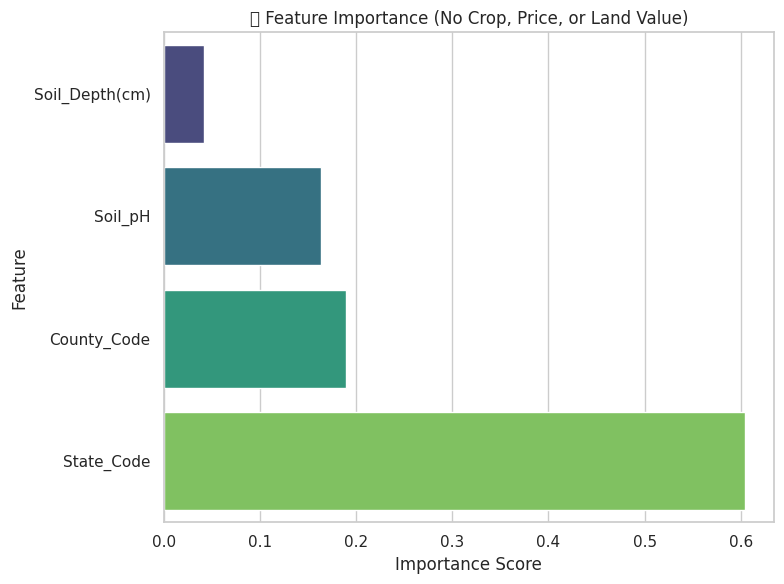

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/dataset_capstone.csv')

# Encode categorical features
df['State_Code'] = df['State'].astype('category').cat.codes
df['County_Code'] = df['County'].astype('category').cat.codes

# Select meaningful features (no Crop_Code, Price, or Land_Value)
features = ['Soil_pH', 'Soil_Depth(cm)', 'State_Code', 'County_Code']
X = df[features]
y = df['yield_kg_per_acre']

# Drop NA values
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Fixed here

print(f"🔍 Random Forest Performance (No Crop, Price, Land Value):")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot Feature Importances
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("🌿 Feature Importance (No Crop, Price, or Land Value)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('/dataset_capstone.csv', low_memory=False)

🔍 Model Evaluation (Soil pH & Depth only):
R² Score: 0.062
MAE: 1251.17
RMSE: 1412.59


<ipython-input-45-849f8a0f2b16>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='coolwarm')
<ipython-input-45-849f8a0f2b16>:49: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


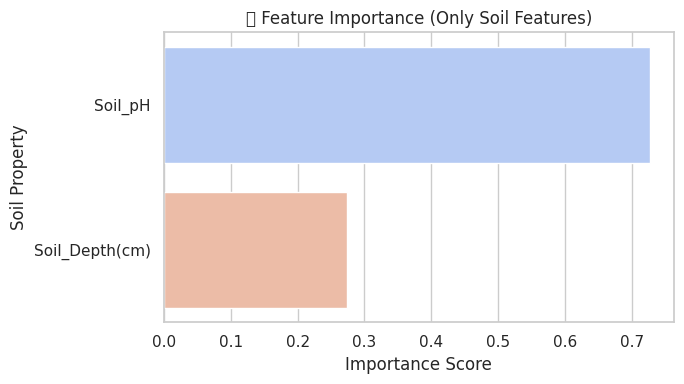

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Load dataset
df = pd.read_csv('/dataset_capstone.csv', low_memory=False)

# Step 2: Select only soil features and target
features = ['Soil_pH', 'Soil_Depth(cm)']
target = 'yield_kg_per_acre'

# Step 3: Drop rows with missing values in selected columns
df = df[features + [target]].dropna()

# Step 4: Define features (X) and target (y)
X = df[features]
y = df[target]

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Step 7: Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # compatible version

print("🔍 Model Evaluation (Soil pH & Depth only):")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Step 8: Feature Importance Plot
importances = rf.feature_importances_
feature_names = features

plt.figure(figsize=(7, 4))
sns.barplot(x=importances, y=feature_names, palette='coolwarm')
plt.title("🌿 Feature Importance (Only Soil Features)")
plt.xlabel("Importance Score")
plt.ylabel("Soil Property")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Define chunk size
chunk_size = 10000
chunks = []

# Read CSV in chunks
for chunk in pd.read_csv("/dataset_capstone.csv", chunksize=chunk_size):
    filtered = chunk[chunk['Land_Value'] > 0].copy()
    filtered['Profitability_Index'] = (filtered['yield_kg_per_acre'] * filtered['price_usd_per_kg']) / filtered['Land_Value']
    chunks.append(filtered[['State', 'County', 'Commodity', 'Profitability_Index']])

# Combine chunks into one DataFrame
df = pd.concat(chunks)

# Proceed with analysis
county_profit = df.groupby(['State', 'County', 'Commodity'])['Profitability_Index'].mean().reset_index()
top_counties_profit = county_profit.sort_values(by='Profitability_Index', ascending=False).head(10)

state_profit = df.groupby(['State', 'Commodity'])['Profitability_Index'].mean().reset_index()
top_states_profit = state_profit.sort_values(by='Profitability_Index', ascending=False).head(10)

# Save or visualize
top_counties_profit.to_csv("top_counties_profitability.csv", index=False)
top_states_profit.to_csv("top_states_profitability.csv", index=False)

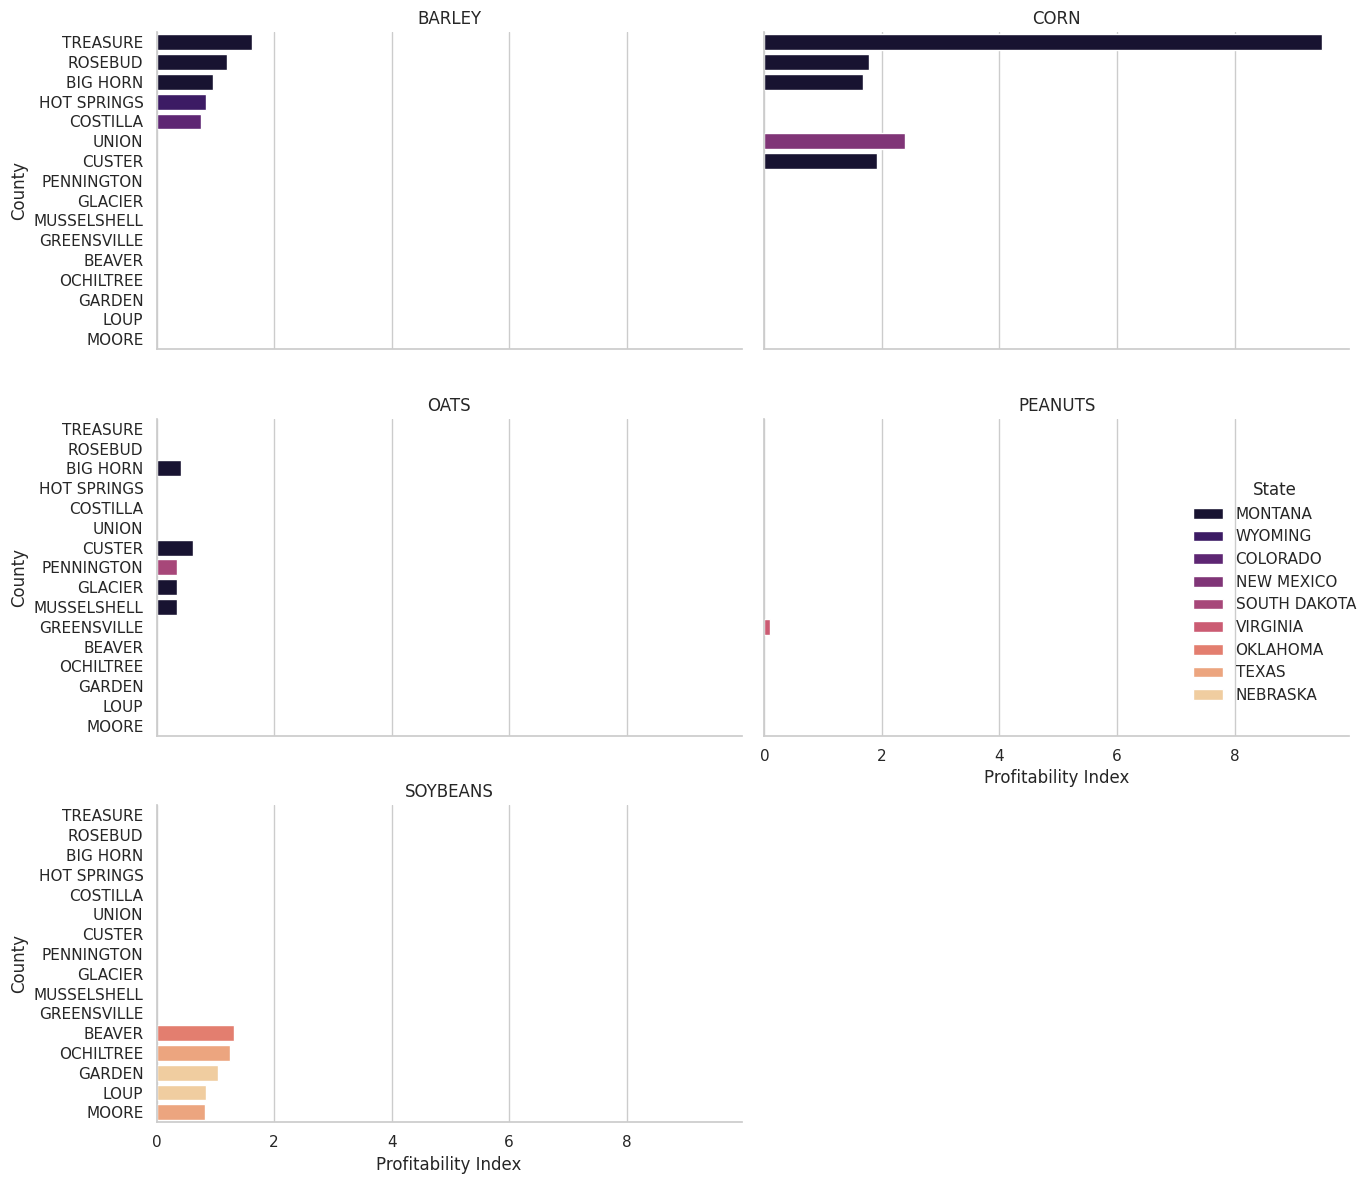


📍 Top 5 Counties for BARLEY:


,State,County,Profitability_Index
132,MONTANA,TREASURE,1.617332
126,MONTANA,ROSEBUD,1.191177
95,MONTANA,BIG HORN,0.960273
274,WYOMING,HOT SPRINGS,0.833376
12,COLORADO,COSTILLA,0.758097



📍 Top 5 Counties for CORN:


,State,County,Profitability_Index
1344,MONTANA,TREASURE,9.479799
1445,NEW MEXICO,UNION,2.386969
1333,MONTANA,CUSTER,1.919805
1340,MONTANA,ROSEBUD,1.787757
1329,MONTANA,BIG HORN,1.685755



📍 Top 5 Counties for OATS:


,State,County,Profitability_Index
2541,MONTANA,CUSTER,0.616418
2536,MONTANA,BIG HORN,0.416138
2826,SOUTH DAKOTA,PENNINGTON,0.349528
2548,MONTANA,GLACIER,0.346991
2555,MONTANA,MUSSELSHELL,0.339110



📍 Top 5 Counties for PEANUTS:


,State,County,Profitability_Index
2939,VIRGINIA,GREENSVILLE,0.102891



📍 Top 5 Counties for SOYBEANS:


,State,County,Profitability_Index
3814,OKLAHOMA,BEAVER,1.309731
4101,TEXAS,OCHILTREE,1.250318
3493,NEBRASKA,GARDEN,1.040628
3513,NEBRASKA,LOUP,0.834386
4100,TEXAS,MOORE,0.817147


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive if needed
# from google.colab import drive
# drive.mount('/content/drive')

# Load dataset from your drive (update the path accordingly)
file_path = "/content/drive/MyDrive/capstone_dataset/dataset_capstone.csv"

# Load necessary columns only
df = pd.read_csv(file_path, usecols=["Commodity", "State", "County", "yield_kg_per_acre", "price_usd_per_kg", "Land_Value"])

# Clean the data
df = df[df["Land_Value"] > 0]
df.dropna(subset=["yield_kg_per_acre", "price_usd_per_kg"], inplace=True)

# Compute profitability index
df["Profitability_Index"] = (df["yield_kg_per_acre"] * df["price_usd_per_kg"]) / df["Land_Value"]

# Group by crop, state, county
top_counties = (
    df.groupby(["Commodity", "State", "County"])["Profitability_Index"]
    .mean()
    .reset_index()
    .sort_values(["Commodity", "Profitability_Index"], ascending=[True, False])
)

# Top 5 counties per crop
top5_per_crop = top_counties.groupby("Commodity").head(5)

# 📊 Plot
g = sns.catplot(
    data=top5_per_crop,
    kind="bar",
    x="Profitability_Index",
    y="County",
    hue="State",
    col="Commodity",
    col_wrap=2,
    height=4,
    aspect=1.5,
    palette="magma"
)
g.set_titles("{col_name}")
g.set_axis_labels("Profitability Index", "County")
plt.tight_layout()

# Save the plot (optional)
plt.savefig("crop_profitability_by_county.png")
plt.show()

# 🔍 Summary Output
for crop in top5_per_crop["Commodity"].unique():
    print(f"\n📍 Top 5 Counties for {crop}:")
    display(top5_per_crop[top5_per_crop["Commodity"] == crop][["State", "County", "Profitability_Index"]])

<ipython-input-49-38e7f3684821>:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


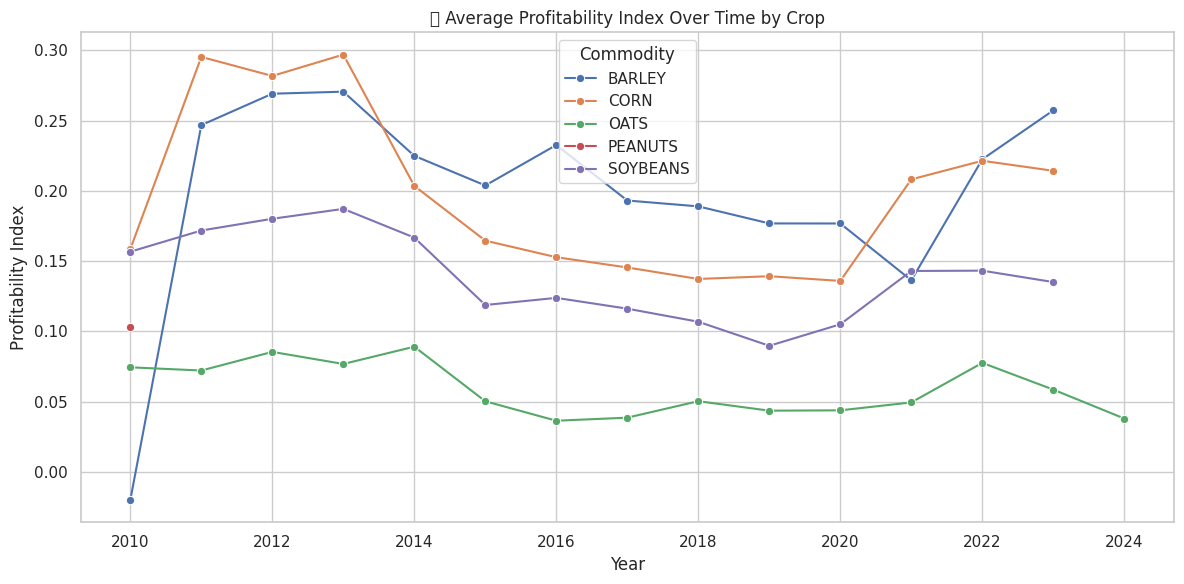

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the path as needed)
df = pd.read_csv('/content/drive/MyDrive/capstone_dataset/dataset_capstone.csv')

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Filter relevant columns
required_cols = ['Year', 'Commodity', 'yield_kg_per_acre', 'price_usd_per_kg', 'Land_Value']
df = df[required_cols].dropna()

# Calculate Profitability Index
df['Profitability_Index'] = (df['yield_kg_per_acre'] * df['price_usd_per_kg']) / df['Land_Value']

# Group by year and crop
profit_trend = df.groupby(['Year', 'Commodity'])['Profitability_Index'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=profit_trend, x='Year', y='Profitability_Index', hue='Commodity', marker='o')
plt.title('📈 Average Profitability Index Over Time by Crop')
plt.xlabel('Year')
plt.ylabel('Profitability Index')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-50-eba6a4cdb51f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


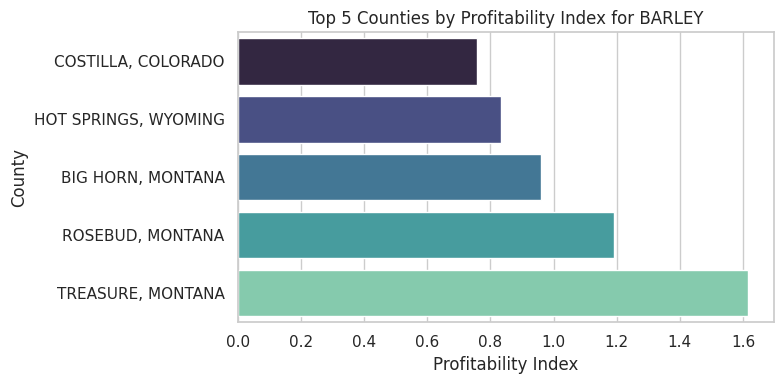

<ipython-input-50-eba6a4cdb51f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


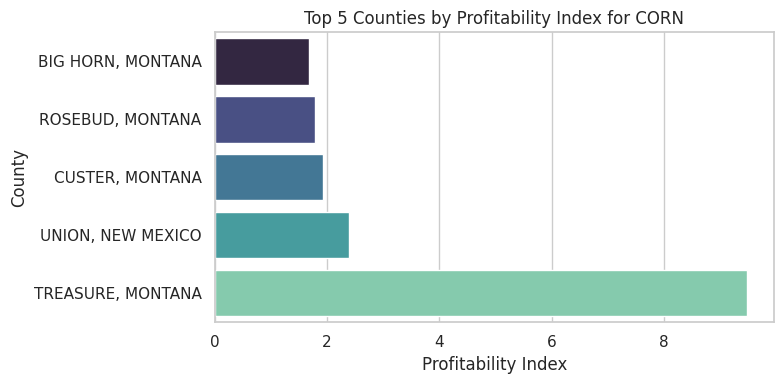

<ipython-input-50-eba6a4cdb51f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


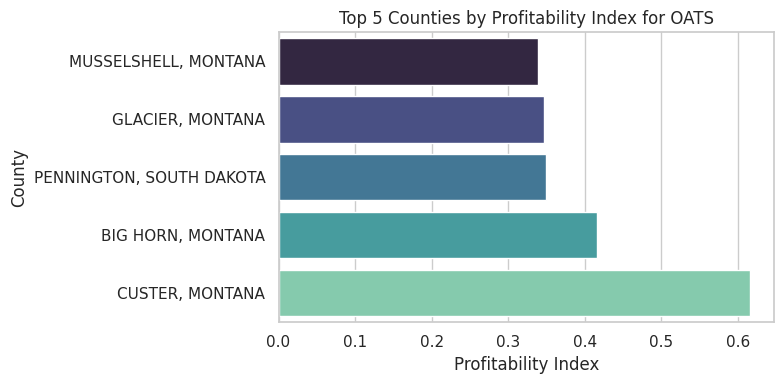

<ipython-input-50-eba6a4cdb51f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


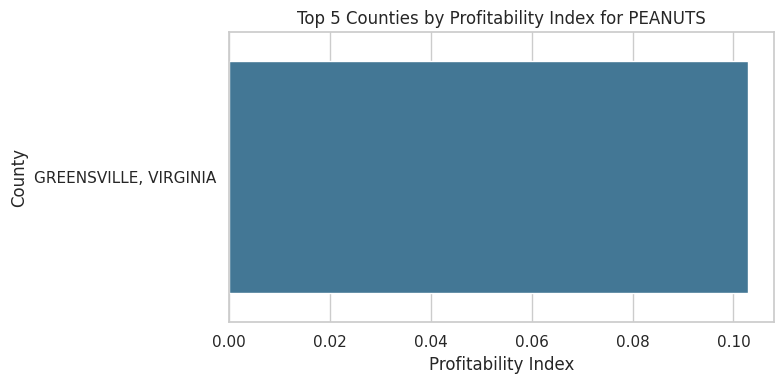

<ipython-input-50-eba6a4cdb51f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


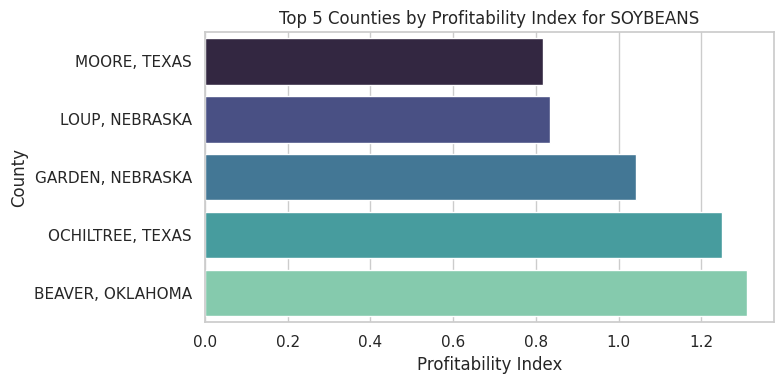

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Data for top 5 counties per crop
data = {
    "Crop": [
        "BARLEY", "BARLEY", "BARLEY", "BARLEY", "BARLEY",
        "CORN", "CORN", "CORN", "CORN", "CORN",
        "OATS", "OATS", "OATS", "OATS", "OATS",
        "PEANUTS",
        "SOYBEANS", "SOYBEANS", "SOYBEANS", "SOYBEANS", "SOYBEANS"
    ],
    "State": [
        "MONTANA", "MONTANA", "MONTANA", "WYOMING", "COLORADO",
        "MONTANA", "NEW MEXICO", "MONTANA", "MONTANA", "MONTANA",
        "MONTANA", "MONTANA", "SOUTH DAKOTA", "MONTANA", "MONTANA",
        "VIRGINIA",
        "OKLAHOMA", "TEXAS", "NEBRASKA", "NEBRASKA", "TEXAS"
    ],
    "County": [
        "TREASURE", "ROSEBUD", "BIG HORN", "HOT SPRINGS", "COSTILLA",
        "TREASURE", "UNION", "CUSTER", "ROSEBUD", "BIG HORN",
        "CUSTER", "BIG HORN", "PENNINGTON", "GLACIER", "MUSSELSHELL",
        "GREENSVILLE",
        "BEAVER", "OCHILTREE", "GARDEN", "LOUP", "MOORE"
    ],
    "Profitability_Index": [
        1.617332, 1.191177, 0.960273, 0.833376, 0.758097,
        9.479799, 2.386969, 1.919805, 1.787757, 1.685755,
        0.616418, 0.416138, 0.349528, 0.346991, 0.339110,
        0.102891,
        1.309731, 1.250318, 1.040628, 0.834386, 0.817147
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["County_Label"] = df["County"] + ", " + df["State"]

# Plot: One barplot per crop
unique_crops = df["Crop"].unique()
for crop in unique_crops:
    plt.figure(figsize=(8, 4))
    sub_df = df[df["Crop"] == crop].sort_values("Profitability_Index", ascending=True)

    sns.barplot(
        data=sub_df,
        x="Profitability_Index",
        y="County_Label",
        palette="mako"
    )
    plt.title(f"Top 5 Counties by Profitability Index for {crop}")
    plt.xlabel("Profitability Index")
    plt.ylabel("County")
    plt.tight_layout()
    plt.show()

<ipython-input-52-9dca45348ec6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


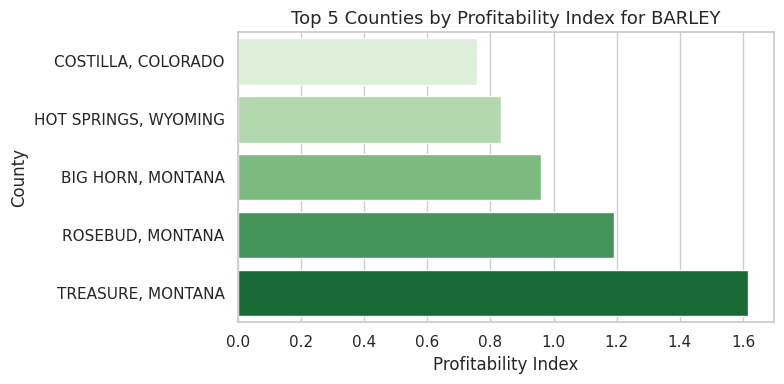

<ipython-input-52-9dca45348ec6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


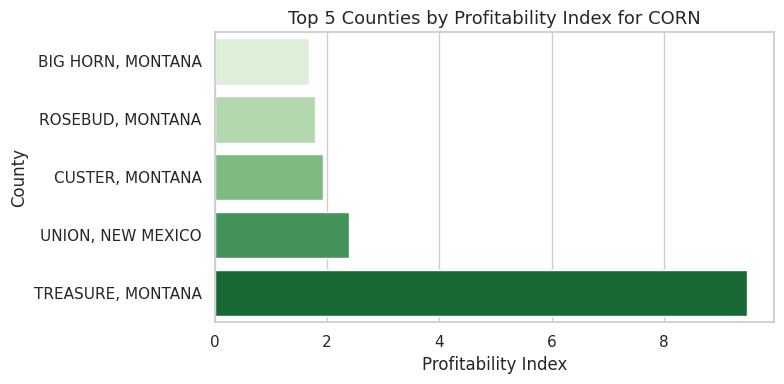

<ipython-input-52-9dca45348ec6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


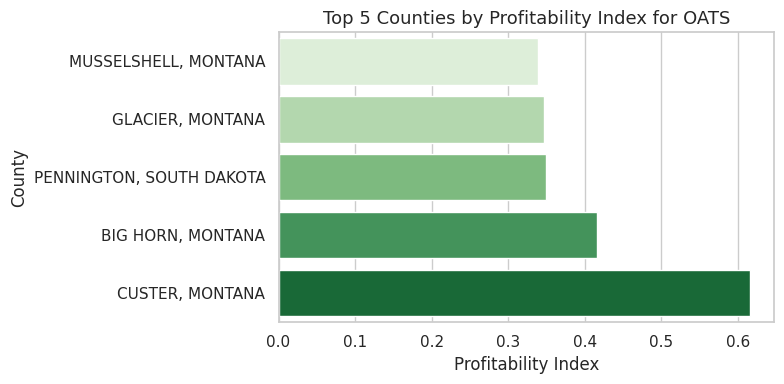

<ipython-input-52-9dca45348ec6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


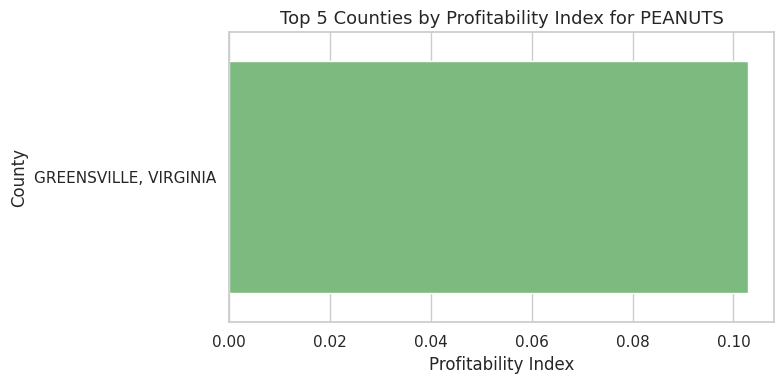

<ipython-input-52-9dca45348ec6>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


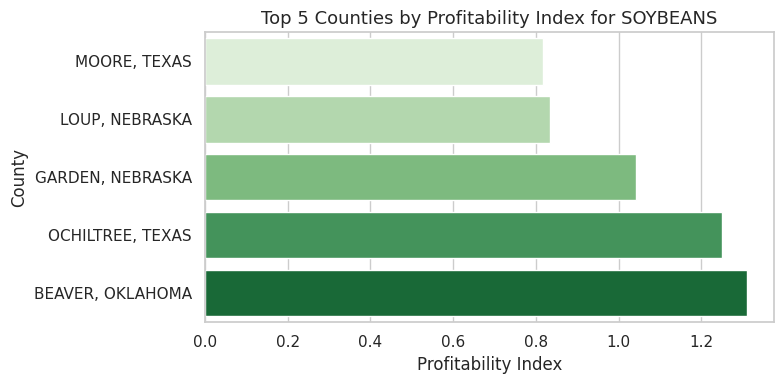

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style
sns.set(style="whitegrid")

# Data for top 5 counties per crop
data = {
    "Crop": [
        "BARLEY", "BARLEY", "BARLEY", "BARLEY", "BARLEY",
        "CORN", "CORN", "CORN", "CORN", "CORN",
        "OATS", "OATS", "OATS", "OATS", "OATS",
        "PEANUTS",
        "SOYBEANS", "SOYBEANS", "SOYBEANS", "SOYBEANS", "SOYBEANS"
    ],
    "State": [
        "MONTANA", "MONTANA", "MONTANA", "WYOMING", "COLORADO",
        "MONTANA", "NEW MEXICO", "MONTANA", "MONTANA", "MONTANA",
        "MONTANA", "MONTANA", "SOUTH DAKOTA", "MONTANA", "MONTANA",
        "VIRGINIA",
        "OKLAHOMA", "TEXAS", "NEBRASKA", "NEBRASKA", "TEXAS"
    ],
    "County": [
        "TREASURE", "ROSEBUD", "BIG HORN", "HOT SPRINGS", "COSTILLA",
        "TREASURE", "UNION", "CUSTER", "ROSEBUD", "BIG HORN",
        "CUSTER", "BIG HORN", "PENNINGTON", "GLACIER", "MUSSELSHELL",
        "GREENSVILLE",
        "BEAVER", "OCHILTREE", "GARDEN", "LOUP", "MOORE"
    ],
    "Profitability_Index": [
        1.617332, 1.191177, 0.960273, 0.833376, 0.758097,
        9.479799, 2.386969, 1.919805, 1.787757, 1.685755,
        0.616418, 0.416138, 0.349528, 0.346991, 0.339110,
        0.102891,
        1.309731, 1.250318, 1.040628, 0.834386, 0.817147
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["County_Label"] = df["County"] + ", " + df["State"]

# Plot: One barplot per crop in green shades
for crop in df["Crop"].unique():
    plt.figure(figsize=(8, 4))
    sub_df = df[df["Crop"] == crop].sort_values("Profitability_Index", ascending=True)

    sns.barplot(
        data=sub_df,
        x="Profitability_Index",
        y="County_Label",
        palette="Greens"
    )
    plt.title(f"Top 5 Counties by Profitability Index for {crop}", fontsize=13)
    plt.xlabel("Profitability Index")
    plt.ylabel("County")
    plt.tight_layout()
    plt.show()